# Blood Donation Driven Data competition attempt 
This was my attempt to use a Decision Tree Classifier, while trying a bit of data exploration.

I submitted this for a Driven Data competition for fun: https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/submissions/

In [24]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

#read the training file in
train = pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\Blood Donations\dtraining.csv")

In [25]:
analyse=train.drop('Unnamed: 0',axis=1)
analyse= analyse.groupby(['Made Donation in March 2007'])
analyse.describe()

Months since First Donation                        \
                                                  count       mean        std   
Made Donation in March 2007                                                     
0                                                 438.0  34.319635  24.519606   
1                                                 138.0  33.195652  23.343158   

                                                           \
                             min   25%   50%    75%   max   
Made Donation in March 2007                                 
0                            2.0  16.0  27.0  51.75  98.0   
1                            2.0  16.0  28.0  45.75  98.0   

                            Months since Last Donation              ...     \
                                                 count       mean   ...      
Made Donation in March 2007                                         ...      
0                                                438.0  10.636986   ...      
1                                                138.0   5.637681   ...      

                            Number of Donations        \
                                            75%   max   
Made Donation in March 2007                             
0                                           6.0  44.0   
1                                           9.0  50.0   

                            Total Volume Donated (c.c.)               \
                                                  count         mean   
Made Donation in March 2007                                            
0                                                 438.0  1179.223744   
1                                                 138.0  1920.289855   

                                                                        \
                                     std    min    25%     50%     75%   
Made Donation in March 2007                                              
0                            1182.496231  250.0  500.0   750.0  1500.0   
1                            1939.548424  250.0  750.0  1500.0  2250.0   

                                      
                                 max  
Made Donation in March 2007           
0                            11000.0  
1                            12500.0  

[2 rows x 32 columns]

In [26]:
print(train.columns.values)

['Unnamed: 0' 'Months since Last Donation' 'Number of Donations'
 'Total Volume Donated (c.c.)' 'Months since First Donation'
 'Made Donation in March 2007']


First, exploring variables and how their characteristics differ between donors and non-donors in March 2007.

In [27]:
Vol_notdonated=train.loc[train['Made Donation in March 2007'] == 0, 'Total Volume Donated (c.c.)']
Vol_donated=train.loc[train['Made Donation in March 2007'] == 1, 'Total Volume Donated (c.c.)']

In [28]:
Vol_donated.describe()

count      138.000000
mean      1920.289855
std       1939.548424
min        250.000000
25%        750.000000
50%       1500.000000
75%       2250.000000
max      12500.000000
Name: Total Volume Donated (c.c.), dtype: float64

In [29]:
Vol_notdonated.describe()

count      438.000000
mean      1179.223744
std       1182.496231
min        250.000000
25%        500.000000
50%        750.000000
75%       1500.000000
max      11000.000000
Name: Total Volume Donated (c.c.), dtype: float64

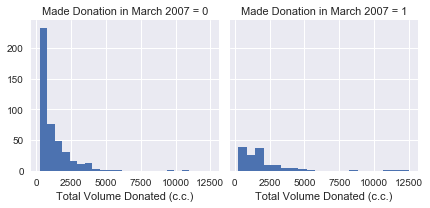

In [30]:
g = sns.FacetGrid(train, col="Made Donation in March 2007")
g.map(plt.hist, 'Total Volume Donated (c.c.)', bins=20)

Distributions for 'Total Volume Donated (c.c.)' are very similar but  means and median differ - those who made a donation donated more in total volume compared to those who did not donate.

In [31]:
months_lastnotdonated=train.loc[train['Made Donation in March 2007'] == 0, 'Months since Last Donation']
months_lastdonated=train.loc[train['Made Donation in March 2007'] == 1, 'Months since Last Donation']

In [32]:
months_lastdonated.describe()

count    138.000000
mean       5.637681
std        5.513013
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       26.000000
Name: Months since Last Donation, dtype: float64

In [33]:
months_lastnotdonated.describe()

count    438.000000
mean      10.636986
std        8.509690
min        0.000000
25%        4.000000
50%       11.000000
75%       16.000000
max       74.000000
Name: Months since Last Donation, dtype: float64

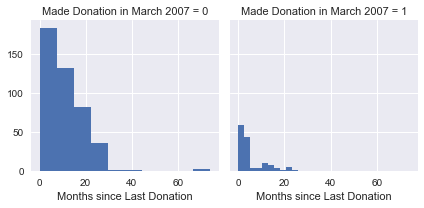

In [34]:
g = sns.FacetGrid(train, col="Made Donation in March 2007")
g.map(plt.hist, 'Months since Last Donation', bins=10)

Both distribution and means of for the 'Months since Last Donation' are very different for both donors and non-donors. Overall, those who donated in March 2007 tend to have had less of a gap in months since their last donation. 

In [35]:
months_firstnotdonated=train.loc[train['Made Donation in March 2007'] == 0, 'Months since First Donation']
months_firstdonated=train.loc[train['Made Donation in March 2007'] == 1, 'Months since First Donation']

In [36]:
months_firstdonated.describe()

count    138.000000
mean      33.195652
std       23.343158
min        2.000000
25%       16.000000
50%       28.000000
75%       45.750000
max       98.000000
Name: Months since First Donation, dtype: float64

In [37]:
months_firstnotdonated.describe()

count    438.000000
mean      34.319635
std       24.519606
min        2.000000
25%       16.000000
50%       27.000000
75%       51.750000
max       98.000000
Name: Months since First Donation, dtype: float64

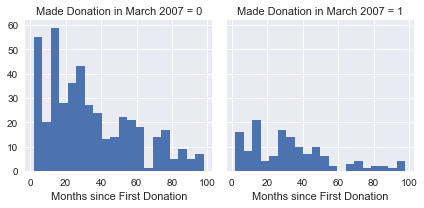

In [38]:
g = sns.FacetGrid(train, col="Made Donation in March 2007")
g.map(plt.hist, 'Months since First Donation', bins=20)

Distributions and means are very similar for donors and non-donors. Thus my hunch is to drop this variable from the model, as it may not have much predictive power in determining whether a donor donated in March 2007 or not. 

In [39]:
nodonations_notdonated=train.loc[train['Made Donation in March 2007'] == 0, 'Number of Donations']
nodonations_donated=train.loc[train['Made Donation in March 2007'] == 1, 'Number of Donations']

In [40]:
nodonations_notdonated.describe()

count    438.000000
mean       4.716895
std        4.729985
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       44.000000
Name: Number of Donations, dtype: float64

In [41]:
nodonations_donated.describe()

count    138.000000
mean       7.681159
std        7.758194
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       50.000000
Name: Number of Donations, dtype: float64

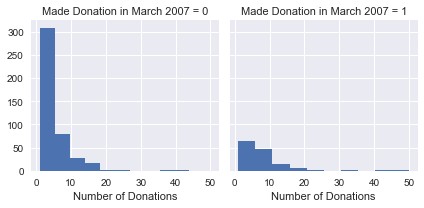

In [42]:
g = sns.FacetGrid(train, col="Made Donation in March 2007")
g.map(plt.hist, 'Number of Donations', bins=10)

Again, similar distribution and mean. But there is a difference in the means of the two groups, hence will include this in the model for now. Those who donated in March 2007 tend to donate more times compared to those who did not donate.

Findings so far:
1. Larger number of non-donors compared to donors in March 2007 (~76% are non-donors compared to donors).
2. The distribution of the variable 'Months since First Donation' appear to be very similar among donors and non donors. Hence, first attempt is to remove this variable from the model. 'Total Volume Donated (c.c.)' and 'Number of Donations' distributions are also very similar, but the means differ between donors and non-donors, hence keep these variables first.

Let me try to cut the Months into bands and see the correlation with donors and non-donors.

First, I'd like to look at the distribution of the variables.

In [43]:
train.columns

Index([u'Unnamed: 0', u'Months since Last Donation', u'Number of Donations',
       u'Total Volume Donated (c.c.)', u'Months since First Donation',
       u'Made Donation in March 2007'],
      dtype='object')

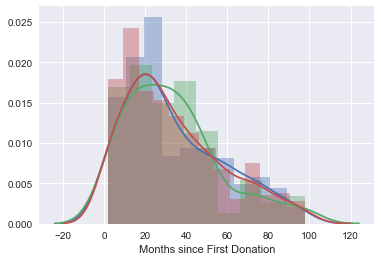

In [52]:
#comapring distributions for donors vs non-donors, and overall
sns.distplot(months_firstnotdonated)
sns.distplot(months_firstdonated)
sns.distplot(train['Months since First Donation'])

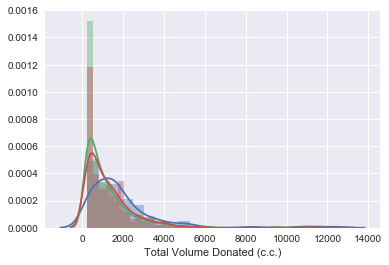

In [53]:
sns.distplot(Vol_donated)
sns.distplot(Vol_notdonated)
sns.distplot(train['Total Volume Donated (c.c.)'])

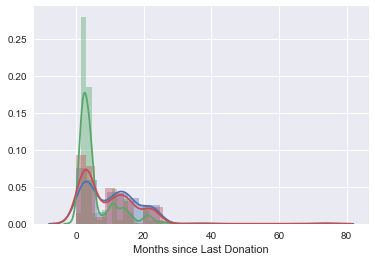

In [60]:
sns.distplot(months_lastnotdonated)
sns.distplot(months_lastdonated)
sns.distplot(train['Months since Last Donation'])

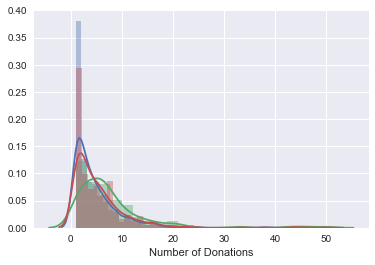

In [70]:
sns.distplot(nodonations_notdonated)
sns.distplot(nodonations_donated)
sns.distplot(train['Number of Donations'])

In [ ]:
#cutting Months since First Donation into bands
train['FirstMonthBand'] = pd.cut(train['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

First, I want to try and use a decision tree on all the variables first, as that is a good way to look at the variable importance.

In [537]:
#drop the 'Unnamed : 0' variable as this is our ID variable that should not be a predictor variable
train=train.drop('Unnamed: 0', axis=1)

In [538]:
#split the training set into X and Y
X = train.drop('Made Donation in March 2007',axis=1)
y = train[['Made Donation in March 2007']]

In [539]:
#split into training and testing sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [540]:
#fit the decision tree model onto training data
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [541]:
#use trained model to predict test data
preds=clf.predict_proba(X_test)

In [542]:
#check accuracy score
print clf.score(X_test, y_test)

0.629310344828


In [543]:
#test classification error
from sklearn.metrics import log_loss
score=log_loss(y_test, preds)
print (score)

10.8135065535


This doesn't look too good, especially since the current leaderboard scores are less than 1! In fact, the latest best score is only 0.48 or so.

Next, I will check the feature importance.

In [544]:
#print feature importance ranking from model
features=clf.feature_importances_ 
print (features)

[ 0.28551285  0.21197811  0.11162363  0.39088541]


In [545]:
X_train.columns

Index([u'Months since Last Donation', u'Number of Donations',
       u'Total Volume Donated (c.c.)', u'Months since First Donation'],
      dtype='object')

We can see that the most important feature is the Months since First Donation, followed by Months since Last Donation, followed by Total Volume Donated, and lastly, Number of Donations. 

Does this mean that my hypothesis earlier was wrong? I'm not sure. Let me try removing the Number of Donations variable and see whether my model score improves.

In [546]:
#drop the 'Number of Donations' variable
train2=train.drop('Number of Donations', axis=1)

In [547]:
#split the training set into X and Y
X = train2.drop('Made Donation in March 2007',axis=1)
y = train2[['Made Donation in March 2007']]

In [548]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [549]:
#fit the decision tree model onto training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [550]:
#use trained model to predict test data
preds=clf.predict_proba(X_test)

In [551]:
#check accuracy score
print clf.score(X_test, y_test)

0.637931034483


In [552]:
#test classification error
from sklearn.metrics import log_loss
score=log_loss(y_test, preds)
print (score)

10.5157584811


In [553]:
#print feature importance ranking from model
features=clf.feature_importances_ 
print (features)

[ 0.28701284  0.32605116  0.386936  ]


Hm, it hasn't improved at all! In fact, the score got slightly worse! Let me ignore the feature importance, and try to test my hypothesis. 

I'm going to try removing the variable 'Months since First Donation' as there are very similar distributions for both donors and non-donors.

In [554]:
#drop the 'Months since First Donation' variable due to similarity in distribution
train3=train.drop('Months since First Donation', axis=1)

In [555]:
#split the training set into X and Y
X = train3.drop('Made Donation in March 2007',axis=1)
y = train3[['Made Donation in March 2007']]

In [556]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [557]:
#fit the decision tree model onto training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [558]:
#use trained model to predict test data
preds=clf.predict_proba(X_test)

In [559]:
#check accuracy score
print clf.score(X_test, y_test)

0.724137931034


In [560]:
#test classification error
score=log_loss(y_test, preds)
print (score)

3.11011401834


In [561]:
#print feature importance ranking from model
features=clf.feature_importances_ 
print (features)

[ 0.47728428  0.15081908  0.37189663]


The feature importance ranking has changed, once we removed that variable. 

A much better score compared to the previous two versions!
I'd like to see if I can improve the tweaking the decision tree model parameters.

In [562]:
#fit the decision tree model onto training data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
#use trained model to predict test data
preds=clf.predict_proba(X_test)
#check accuracy score
print clf.score(X_test, y_test)
score=log_loss(y_test, preds)
print (score)

0.689655172414
0.560924590997


A slightly lower accuracy score, but a better log loss score.

In [574]:
#use this model to predict on test cases
#import test file
test = pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\Blood Donations\dtest.csv")

In [575]:
#drop 'Months since First Donation' and ID columns
test2=test.drop('Months since First Donation', axis=1)
test2=test2.drop('Unnamed: 0', axis=1)

In [576]:
#use trained model on test data set
preds2=clf.predict_proba(test2)

In [577]:
#convert array from model into data frame column
preds_df=pd.DataFrame(preds2[:,1], columns=["Made Donation in March 2007"])

In [578]:
#manipulate data set to follow submission format
dsub=test.join(preds_df)
dsub=dsub[['Unnamed: 0','Made Donation in March 2007']]
dsub.to_csv(path_or_buf='submission.csv',index=False)

Best score so far, 0.4968.